# Create a MOC from a filtered astropy Table

In [2]:
from mocpy import MOC

import astropy.units as u
from astropy.coordinates import Angle, SkyCoord

from astroquery.vizier import Vizier

In [3]:
viz = Vizier(columns=["*", "_RAJ2000", "_DEJ2000"])
viz.ROW_LIMIT = -1
table = viz.get_catalogs("I/293/npm2cros")[0]

In [4]:
galex = MOC.from_fits("../resources/P-GALEXGR6-AIS-FUV.fits")

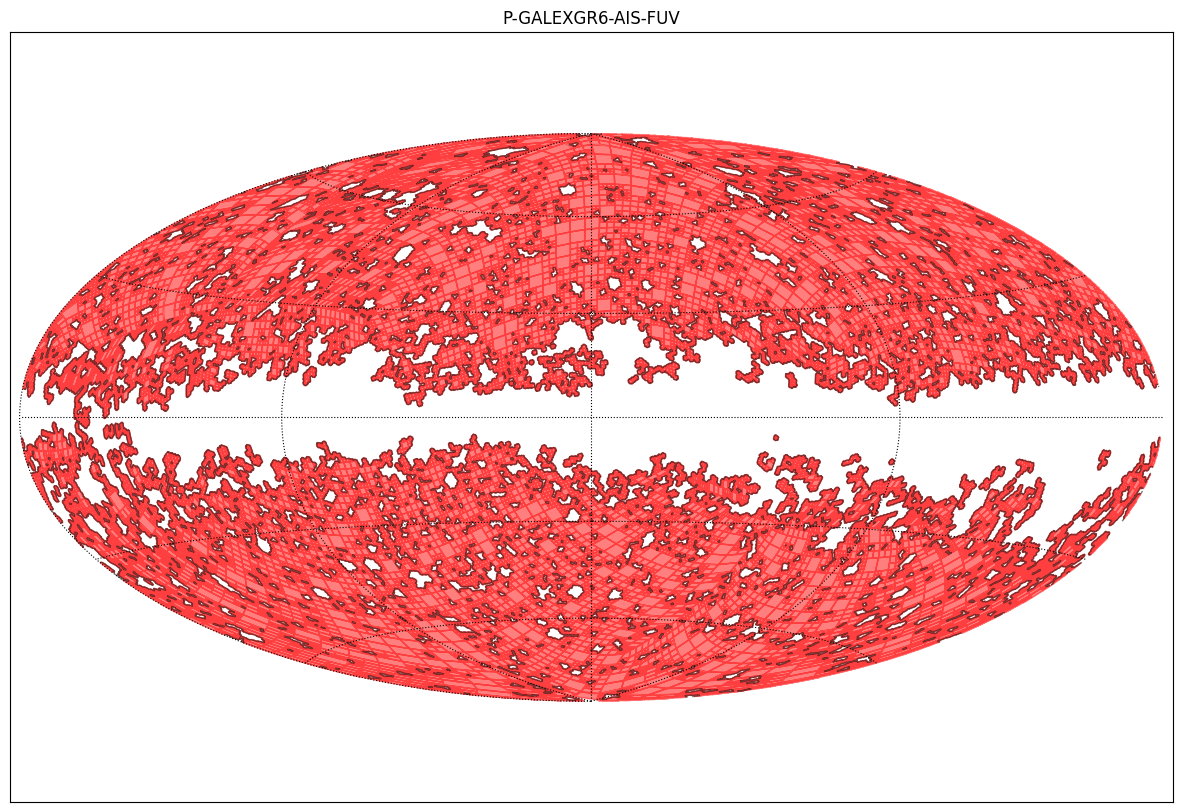

In [5]:
def plot(moc, title=""):
    """Create a plot of a MOC."""
    import matplotlib.pyplot as plt

    fig = plt.figure(figsize=(15, 10))
    from mocpy import WCS

    with WCS(
        fig,
        fov=330 * u.deg,
        center=SkyCoord(0, 0, unit="deg", frame="galactic"),
        coordsys="galactic",
        rotation=Angle(0, u.degree),
        projection="AIT",
    ) as wcs:
        ax = fig.add_subplot(1, 1, 1, projection=wcs)

        moc.fill(
            ax=ax,
            wcs=wcs,
            edgecolor="r",
            facecolor="r",
            linewidth=1.0,
            fill=True,
            alpha=0.5,
        )
        moc.border(ax=ax, wcs=wcs, color="black", alpha=0.5)

    plt.xlabel("ra")
    plt.ylabel("dec")
    if title:
        plt.title(title)
    plt.grid(color="black", linestyle="dotted")
    plt.show()
    plt.close()


plot(moc=galex, title="P-GALEXGR6-AIS-FUV")

In [6]:
print(table)

 _RAJ2000   _DEJ2000    NPM2   KLA  RAJ2000   ...  IQ  IN r_Star  mag  tyc
   deg        deg                   'h:m:s'   ...                 mag     
---------- ---------- -------- --- ---------- ... --- --- ------ ----- ---
339.638333  83.166667 +83.0016 HPM 22 38 33.2 ...   0   0    811 14.20    
339.638333  83.166667 +83.0016 HPM 22 38 33.2 ...   0   0    813 14.20    
349.530833  83.010556 +83.0022 VAR 23 18 07.4 ...   0   0    843    --   T
349.530833  83.010556 +83.0022 SRA 23 18 07.4 ...   0   0      1  9.60   T
323.854167  82.997222 +82.0030 UBV 21 35 25.0 ...   0   0      5 10.08   T
332.107917  82.747500 +82.0055  WD 22 08 25.9 ...   0   0   1012 16.00    
332.933750  82.607778 +82.0059 HPM 22 11 44.1 ...   0   0    811 16.70    
335.088750  82.970833 +82.0065 HPM 22 20 21.3 ...   0   0    811 11.00   T
337.119167  82.763889 +82.0074 UBV 22 28 28.6 ...   0   0      5 10.42   T
337.274583  82.662222 +82.0075 HPM 22 29 05.9 ...   1   0    811 17.40    
       ...        ...    

In [7]:
indexes = galex.contains(table["_RAJ2000"].T * u.deg, table["_DEJ2000"].T * u.deg)
filtered_table = table[indexes]
print(filtered_table)

 _RAJ2000   _DEJ2000    NPM2   KLA  RAJ2000   ...  IQ  IN r_Star  mag  tyc
   deg        deg                   'h:m:s'   ...                 mag     
---------- ---------- -------- --- ---------- ... --- --- ------ ----- ---
339.638333  83.166667 +83.0016 HPM 22 38 33.2 ...   0   0    811 14.20    
339.638333  83.166667 +83.0016 HPM 22 38 33.2 ...   0   0    813 14.20    
349.530833  83.010556 +83.0022 VAR 23 18 07.4 ...   0   0    843    --   T
349.530833  83.010556 +83.0022 SRA 23 18 07.4 ...   0   0      1  9.60   T
323.854167  82.997222 +82.0030 UBV 21 35 25.0 ...   0   0      5 10.08   T
335.088750  82.970833 +82.0065 HPM 22 20 21.3 ...   0   0    811 11.00   T
337.119167  82.763889 +82.0074 UBV 22 28 28.6 ...   0   0      5 10.42   T
337.274583  82.662222 +82.0075 HPM 22 29 05.9 ...   1   0    811 17.40    
338.337917  82.369167 +82.0079 HPM 22 33 21.1 ...   0   0    811 16.20    
328.960000  81.319167 +81.0032 HPM 21 55 50.4 ...   0   0    811 12.50   T
       ...        ...    

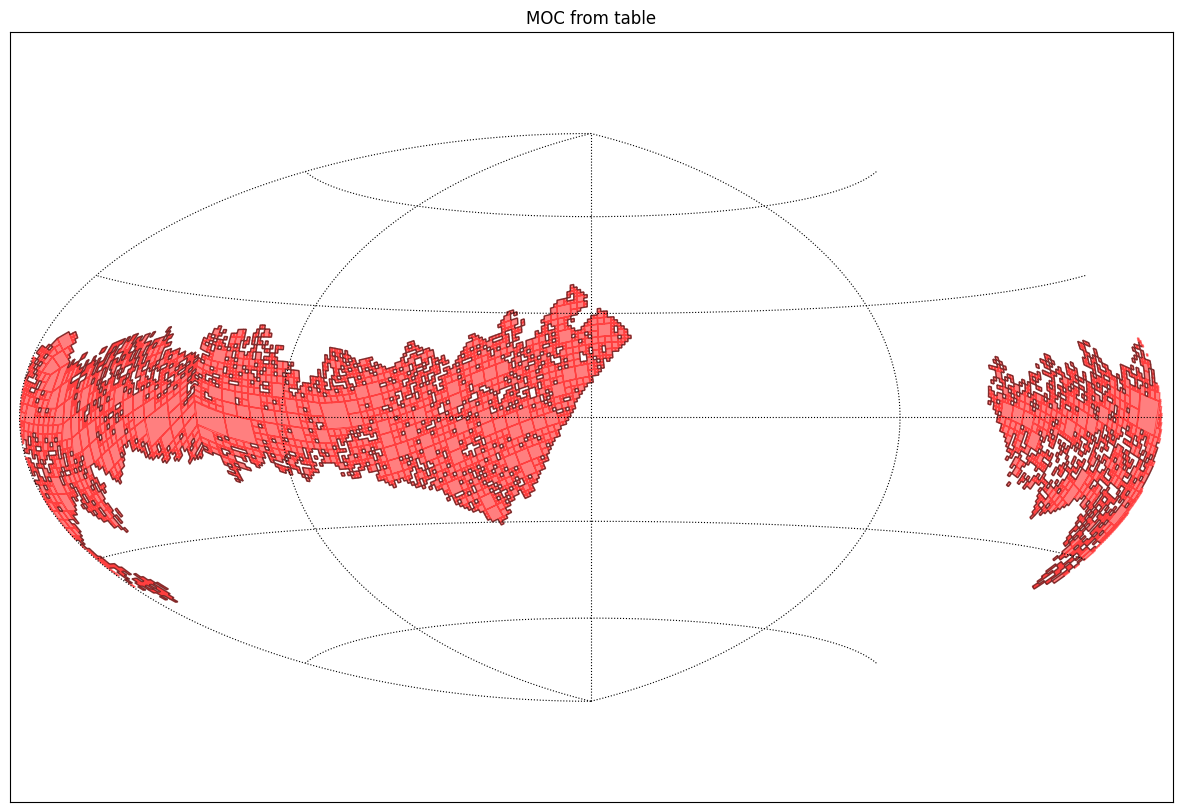

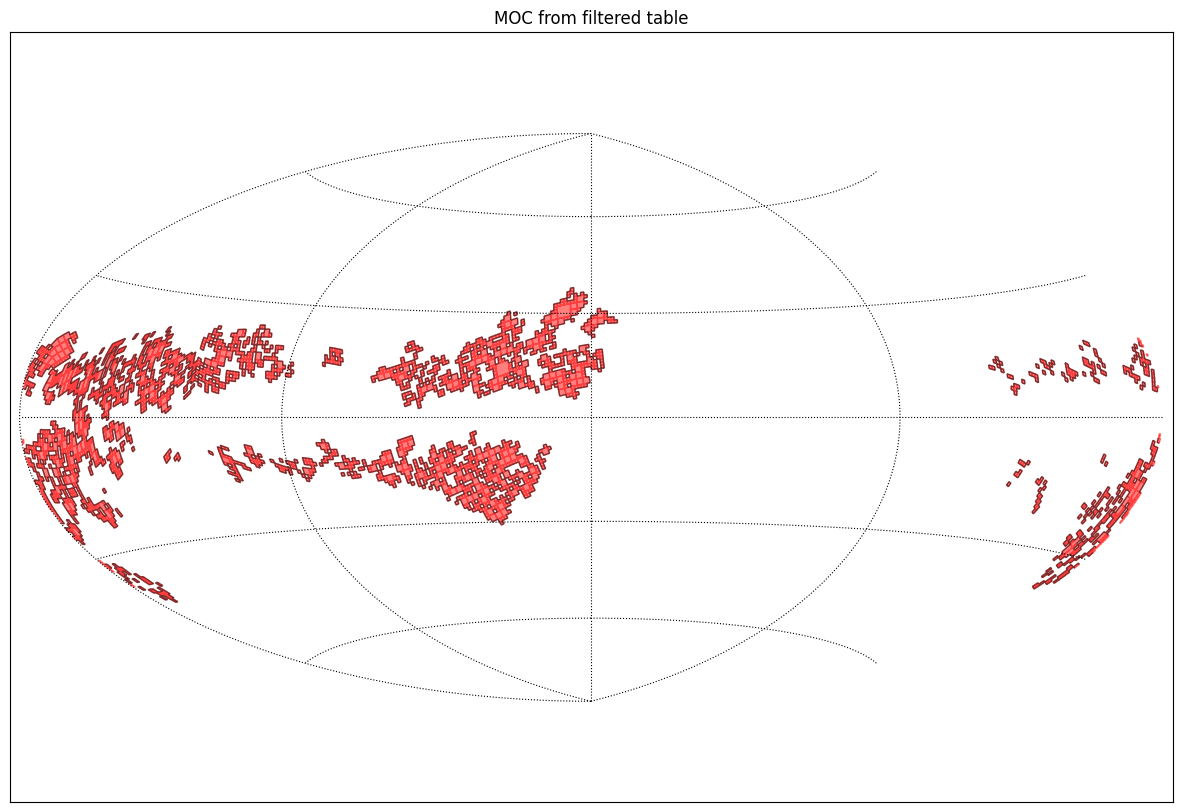

In [8]:
m1 = MOC.from_lonlat(table["_RAJ2000"].T * u.deg, table["_DEJ2000"].T * u.deg, 6)
m2 = MOC.from_lonlat(
    filtered_table["_RAJ2000"].T * u.deg,
    filtered_table["_DEJ2000"].T * u.deg,
    6,
)
plot(moc=m1, title="MOC from table")
plot(moc=m2, title="MOC from filtered table")